In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('/kaggle/input/extinction-of-a-species-data/extinct_species_dataset.csv')
df.head(3)

,Species Name,Years Lived (Million Years),Extinction Reason
0,Trilobite,337.75,Human Impact
1,Smilodon,311.57,Natural Disaster
2,Dodo,67.49,Mass Extinction


In [3]:
len(df)

1000000

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32118 (\N{CJK UNIFIED IDEOGRAPH-7D76}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28357 (\N{CJK UNIFIED IDEOGRAPH-6EC5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30001 (\N{CJK UNIFIED IDEOGRAPH-7531}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/li

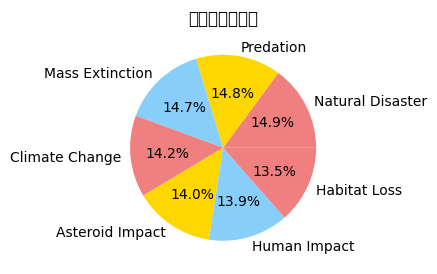

In [4]:
# Randomly sample 10,000 rows
df_sampled = df.sample(n=10000, random_state=42)

# Display the first 3 rows of the sampled dataset
df_sampled.head(3)
    # 生存年数の棒グラフ (各チャンクで処理する場合)
plt.figure(figsize=(3, 4))
extinction_reason_counts = df_sampled['Extinction Reason'].value_counts()
plt.pie(extinction_reason_counts, labels=extinction_reason_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightskyblue'])
plt.title('絶滅理由の内訳')
plt.show()